In [1]:
pip install pandas scikit-learn

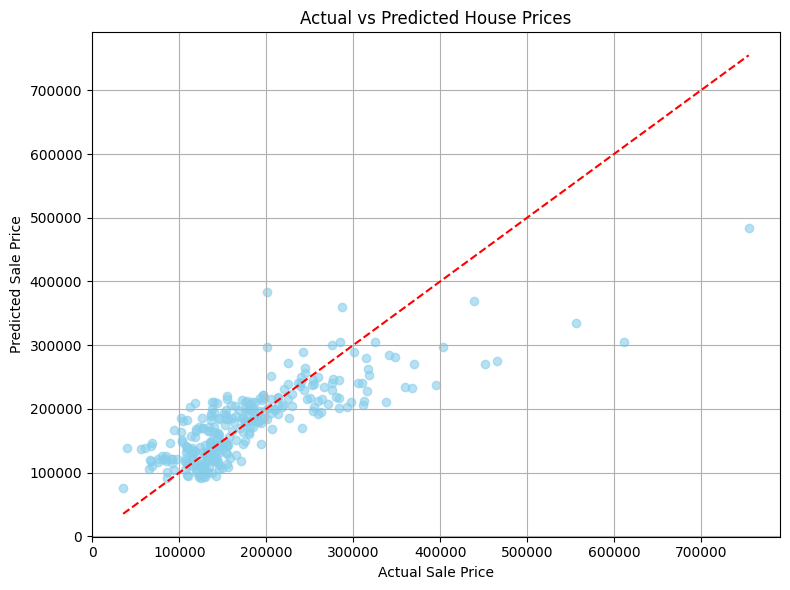

Validation Mean Squared Error: 2806426667.25
Predictions saved to house_price_predictions.csv


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Select the features to use
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Drop rows with missing values in selected columns
train_data = train_df[features + [target]].dropna()

# Separate features and target
X = train_data[features]
y = train_data[target]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set and calculate error
y_pred = model.predict(X_val)

# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.6, color='skyblue')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Diagonal line
plt.grid(True)
plt.tight_layout()
plt.show()

mse = mean_squared_error(y_val, y_pred)
print(f"Validation Mean Squared Error: {mse:.2f}")

# Prepare test data (drop rows with missing values in test)
test_features = test_df[features].dropna()

# Predict house prices on the test set
test_predictions = model.predict(test_features)

# Update the submission file
sample_submission.loc[test_features.index, 'SalePrice'] = test_predictions

# Save predictions to CSV
sample_submission.to_csv("house_price_predictions.csv", index=False)
print("Predictions saved to house_price_predictions.csv")
